# ლექცია 9. 
მონაცემების ფორმის ცვლილება. მონაცემების გახლეჩვა, დამუშავება და გაერთიანება. ჯვარედინა ტაბულაციის ცხრილები. მონაცემების ტრანსფორმაცია გრძელიდან განიერ და განიერიდან გრძელ ფორმატში.
 Stack Unstack
 Pivot table
 melt
 
 

# 1. Reshape dataframe using stack/unstack


In [130]:
import pandas as pd
df = pd.read_excel("stocks.xlsx",header=[0,1], index_col=0)
df

Price                  Price to earnings ratio (P/E)         \
Company    Facebook Google Microsoft                      Facebook Google   
2017-06-05      155    955        66                         37.10   32.0   
2017-06-06      150    987        69                         36.98   31.3   
2017-06-07      153    963        62                         36.78   31.7   
2017-06-08      155   1000        61                         36.11   31.2   
2017-06-09      156   1012        66                         37.07   30.0   

                      
Company    Microsoft  
2017-06-05     30.31  
2017-06-06     30.56  
2017-06-07     30.46  
2017-06-08     30.11  
2017-06-09     31.00

In [126]:
df.stack()

Price  Price to earnings ratio (P/E)
           Company                                        
2017-06-05 Facebook     155                          37.10
           Google       955                          32.00
           Microsoft     66                          30.31
2017-06-06 Facebook     150                          36.98
           Google       987                          31.30
           Microsoft     69                          30.56
2017-06-07 Facebook     153                          36.78
           Google       963                          31.70
           Microsoft     62                          30.46
2017-06-08 Facebook     155                          36.11
           Google      1000                          31.20
           Microsoft     61                          30.11
2017-06-09 Facebook     156                          37.07
           Google      1012                          30.00
           Microsoft     66                          31.00

In [127]:
df.stack(level=0)

Company                                   Facebook  Google  Microsoft
2017-06-05 Price                            155.00   955.0      66.00
           Price to earnings ratio (P/E)     37.10    32.0      30.31
2017-06-06 Price                            150.00   987.0      69.00
           Price to earnings ratio (P/E)     36.98    31.3      30.56
2017-06-07 Price                            153.00   963.0      62.00
           Price to earnings ratio (P/E)     36.78    31.7      30.46
2017-06-08 Price                            155.00  1000.0      61.00
           Price to earnings ratio (P/E)     36.11    31.2      30.11
2017-06-09 Price                            156.00  1012.0      66.00
           Price to earnings ratio (P/E)     37.07    30.0      31.00

In [128]:
df_stacked=df.stack()
df_stacked

Price  Price to earnings ratio (P/E)
           Company                                        
2017-06-05 Facebook     155                          37.10
           Google       955                          32.00
           Microsoft     66                          30.31
2017-06-06 Facebook     150                          36.98
           Google       987                          31.30
           Microsoft     69                          30.56
2017-06-07 Facebook     153                          36.78
           Google       963                          31.70
           Microsoft     62                          30.46
2017-06-08 Facebook     155                          36.11
           Google      1000                          31.20
           Microsoft     61                          30.11
2017-06-09 Facebook     156                          37.07
           Google      1012                          30.00
           Microsoft     66                          31.00

In [129]:
df_stacked.unstack()

Price                  Price to earnings ratio (P/E)         \
Company    Facebook Google Microsoft                      Facebook Google   
2017-06-05      155    955        66                         37.10   32.0   
2017-06-06      150    987        69                         36.98   31.3   
2017-06-07      153    963        62                         36.78   31.7   
2017-06-08      155   1000        61                         36.11   31.2   
2017-06-09      156   1012        66                         37.07   30.0   

                      
Company    Microsoft  
2017-06-05     30.31  
2017-06-06     30.56  
2017-06-07     30.46  
2017-06-08     30.11  
2017-06-09     31.00

### 3 levels of column headers

In [133]:
df2 = pd.read_excel("stocks.xlsx",header=[0,1,2], index_col=0, sheet_name=1)
df2

Price Ratios                                                        \
               Price                  Price to earnings ratio (P/E)          
Company     Facebook Google Microsoft                      Facebook Google   
Q1 2016          155    955        66                         37.10   32.0   
Q2 2016          150    987        69                         36.98   31.3   
Q3 2016          153    963        62                         36.78   31.7   
Q4 2016          155   1000        61                         36.11   31.2   
Q1 2017          156   1012        66                         37.07   30.0   

                  Income Statement                                     \
                         Net Sales                  Net Profit          
Company Microsoft         Facebook Google Microsoft   Facebook Google   
Q1 2016     30.31              2.6     20     18.70       0.80   5.43   
Q2 2016     30.56              3.1     22     21.30       0.97   5.89   
Q3 2016     30.46              4.3     24     21.45       1.20   6.10   
Q4 2016     30.11              6.7     26     21.88       1.67   6.50   
Q1 2017     31.00              8.1     31     22.34       2.03   6.40   

                   
                   
Company Microsoft  
Q1 2016      4.56  
Q2 2016      5.10  
Q3 2016      5.43  
Q4 2016      5.89  
Q1 2017      6.09

In [134]:
df2.stack()

Income Statement           Price Ratios  \
                        Net Profit Net Sales        Price   
        Company                                             
Q1 2016 Facebook              0.80      2.60          155   
        Google                5.43     20.00          955   
        Microsoft             4.56     18.70           66   
Q2 2016 Facebook              0.97      3.10          150   
        Google                5.89     22.00          987   
        Microsoft             5.10     21.30           69   
Q3 2016 Facebook              1.20      4.30          153   
        Google                6.10     24.00          963   
        Microsoft             5.43     21.45           62   
Q4 2016 Facebook              1.67      6.70          155   
        Google                6.50     26.00         1000   
        Microsoft             5.89     21.88           61   
Q1 2017 Facebook              2.03      8.10          156   
        Google                6.40     31.00         1012   
        Microsoft             6.09     22.34           66   

                                                 
                  Price to earnings ratio (P/E)  
        Company                                  
Q1 2016 Facebook                          37.10  
        Google                            32.00  
        Microsoft                         30.31  
Q2 2016 Facebook                          36.98  
        Google                            31.30  
        Microsoft                         30.56  
Q3 2016 Facebook                          36.78  
        Google                            31.70  
        Microsoft                         30.46  
Q4 2016 Facebook                          36.11  
        Google                            31.20  
        Microsoft                         30.11  
Q1 2017 Facebook                          37.07  
        Google                            30.00  
        Microsoft                         31.00

In [135]:
df2.stack(level=0)

Net Profit                  Net Sales         \
Company                    Facebook Google Microsoft  Facebook Google   
Q1 2016 Income Statement       0.80   5.43      4.56       2.6   20.0   
        Price Ratios            NaN    NaN       NaN       NaN    NaN   
Q2 2016 Income Statement       0.97   5.89      5.10       3.1   22.0   
        Price Ratios            NaN    NaN       NaN       NaN    NaN   
Q3 2016 Income Statement       1.20   6.10      5.43       4.3   24.0   
        Price Ratios            NaN    NaN       NaN       NaN    NaN   
Q4 2016 Income Statement       1.67   6.50      5.89       6.7   26.0   
        Price Ratios            NaN    NaN       NaN       NaN    NaN   
Q1 2017 Income Statement       2.03   6.40      6.09       8.1   31.0   
        Price Ratios            NaN    NaN       NaN       NaN    NaN   

                                      Price                    \
Company                  Microsoft Facebook  Google Microsoft   
Q1 2016 Income Statement     18.70      NaN     NaN       NaN   
        Price Ratios           NaN    155.0   955.0      66.0   
Q2 2016 Income Statement     21.30      NaN     NaN       NaN   
        Price Ratios           NaN    150.0   987.0      69.0   
Q3 2016 Income Statement     21.45      NaN     NaN       NaN   
        Price Ratios           NaN    153.0   963.0      62.0   
Q4 2016 Income Statement     21.88      NaN     NaN       NaN   
        Price Ratios           NaN    155.0  1000.0      61.0   
Q1 2017 Income Statement     22.34      NaN     NaN       NaN   
        Price Ratios           NaN    156.0  1012.0      66.0   

                         Price to earnings ratio (P/E)                   
Company                                       Facebook Google Microsoft  
Q1 2016 Income Statement                           NaN    NaN       NaN  
        Price Ratios                             37.10   32.0     30.31  
Q2 2016 Income Statement                           NaN    NaN       NaN  
        Price Ratios                             36.98   31.3     30.56  
Q3 2016 Income Statement                           NaN    NaN       NaN  
        Price Ratios                             36.78   31.7     30.46  
Q4 2016 Income Statement                           NaN    NaN       NaN  
        Price Ratios                             36.11   31.2     30.11  
Q1 2017 Income Statement                           NaN    NaN       NaN  
        Price Ratios                             37.07   30.0     31.00

In [136]:
df2.stack(level=1)

Income Statement                   \
Company                                       Facebook Google Microsoft   
Q1 2016 Net Profit                                0.80   5.43      4.56   
        Net Sales                                 2.60  20.00     18.70   
        Price                                      NaN    NaN       NaN   
        Price to earnings ratio (P/E)              NaN    NaN       NaN   
Q2 2016 Net Profit                                0.97   5.89      5.10   
        Net Sales                                 3.10  22.00     21.30   
        Price                                      NaN    NaN       NaN   
        Price to earnings ratio (P/E)              NaN    NaN       NaN   
Q3 2016 Net Profit                                1.20   6.10      5.43   
        Net Sales                                 4.30  24.00     21.45   
        Price                                      NaN    NaN       NaN   
        Price to earnings ratio (P/E)              NaN    NaN       NaN   
Q4 2016 Net Profit                                1.67   6.50      5.89   
        Net Sales                                 6.70  26.00     21.88   
        Price                                      NaN    NaN       NaN   
        Price to earnings ratio (P/E)              NaN    NaN       NaN   
Q1 2017 Net Profit                                2.03   6.40      6.09   
        Net Sales                                 8.10  31.00     22.34   
        Price                                      NaN    NaN       NaN   
        Price to earnings ratio (P/E)              NaN    NaN       NaN   

                                      Price Ratios                    
Company                                   Facebook  Google Microsoft  
Q1 2016 Net Profit                             NaN     NaN       NaN  
        Net Sales                              NaN     NaN       NaN  
        Price                               155.00   955.0     66.00  
        Price to earnings ratio (P/E)        37.10    32.0     30.31  
Q2 2016 Net Profit                             NaN     NaN       NaN  
        Net Sales                              NaN     NaN       NaN  
        Price                               150.00   987.0     69.00  
        Price to earnings ratio (P/E)        36.98    31.3     30.56  
Q3 2016 Net Profit                             NaN     NaN       NaN  
        Net Sales                              NaN     NaN       NaN  
        Price                               153.00   963.0     62.00  
        Price to earnings ratio (P/E)        36.78    31.7     30.46  
Q4 2016 Net Profit                             NaN     NaN       NaN  
        Net Sales                              NaN     NaN       NaN  
        Price                               155.00  1000.0     61.00  
        Price to earnings ratio (P/E)        36.11    31.2     30.11  
Q1 2017 Net Profit                             NaN     NaN       NaN  
        Net Sales                              NaN     NaN       NaN  
        Price                               156.00  1012.0     66.00  
        Price to earnings ratio (P/E)        37.07    30.0     31.00

In [142]:
df2.stack(level=[0,2])
# df2.stack(level=[1,0])

Net Profit  Net Sales   Price  \
                         Company                                    
Q1 2016 Income Statement Facebook         0.80       2.60     NaN   
                         Google           5.43      20.00     NaN   
                         Microsoft        4.56      18.70     NaN   
        Price Ratios     Facebook          NaN        NaN   155.0   
                         Google            NaN        NaN   955.0   
                         Microsoft         NaN        NaN    66.0   
Q2 2016 Income Statement Facebook         0.97       3.10     NaN   
                         Google           5.89      22.00     NaN   
                         Microsoft        5.10      21.30     NaN   
        Price Ratios     Facebook          NaN        NaN   150.0   
                         Google            NaN        NaN   987.0   
                         Microsoft         NaN        NaN    69.0   
Q3 2016 Income Statement Facebook         1.20       4.30     NaN   
                         Google           6.10      24.00     NaN   
                         Microsoft        5.43      21.45     NaN   
        Price Ratios     Facebook          NaN        NaN   153.0   
                         Google            NaN        NaN   963.0   
                         Microsoft         NaN        NaN    62.0   
Q4 2016 Income Statement Facebook         1.67       6.70     NaN   
                         Google           6.50      26.00     NaN   
                         Microsoft        5.89      21.88     NaN   
        Price Ratios     Facebook          NaN        NaN   155.0   
                         Google            NaN        NaN  1000.0   
                         Microsoft         NaN        NaN    61.0   
Q1 2017 Income Statement Facebook         2.03       8.10     NaN   
                         Google           6.40      31.00     NaN   
                         Microsoft        6.09      22.34     NaN   
        Price Ratios     Facebook          NaN        NaN   156.0   
                         Google            NaN        NaN  1012.0   
                         Microsoft         NaN        NaN    66.0   

                                    Price to earnings ratio (P/E)  
                         Company                                   
Q1 2016 Income Statement Facebook                             NaN  
                         Google                               NaN  
                         Microsoft                            NaN  
        Price Ratios     Facebook                           37.10  
                         Google                             32.00  
                         Microsoft                          30.31  
Q2 2016 Income Statement Facebook                             NaN  
                         Google                               NaN  
                         Microsoft                            NaN  
        Price Ratios     Facebook                           36.98  
                         Google                             31.30  
                         Microsoft                          30.56  
Q3 2016 Income Statement Facebook                             NaN  
                         Google                               NaN  
                         Microsoft                            NaN  
        Price Ratios     Facebook                           36.78  
                         Google                             31.70  
                         Microsoft                          30.46  
Q4 2016 Income Statement Facebook                             NaN  
                         Google                               NaN  
                         Microsoft                            NaN  
        Price Ratios     Facebook                           36.11  
                         Google                             31.20  
                         Microsoft                          30.11  
Q1 2017 Income Statement Facebook                          

## 2. Reshaping a DataFrame using Pandas melt()

This is a notebook for the medium article https://github.com/BindiChen/machine-learning/blob/main/data-analysis/048-pandas-melt/pandas-melt.ipynb

In [1]:
import pandas as pd

In [147]:
df_wide = pd.DataFrame({
   "Country": ["France", "US", "UK"],
   "22/01/2020": [1,2,3],
   "23/01/2020": [4,5,6],
   "24/01/2020": [7,8,9],
   "25/01/2020": [10,11,12],
   "26/01/2020": [13,14,15],
  }
)
df_wide

,Country,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020
0,France,1,4,7,10,13
1,US,2,5,8,11,14
2,UK,3,6,9,12,15


In [148]:
# without any argument
df_wide.melt()

,variable,value
0,Country,France
1,Country,US
2,Country,UK
3,22/01/2020,1
4,22/01/2020,2
5,22/01/2020,3
6,23/01/2020,4
7,23/01/2020,5
8,23/01/2020,6
9,24/01/2020,7


In [150]:
df_wide

,Country,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020
0,France,1,4,7,10,13
1,US,2,5,8,11,14
2,UK,3,6,9,12,15


In [4]:
df_wide.melt(id_vars='Country')

,Country,variable,value
0,France,22/01/2020,1
1,US,22/01/2020,2
2,UK,22/01/2020,3
3,France,23/01/2020,4
4,US,23/01/2020,5
5,UK,23/01/2020,6
6,France,24/01/2020,7
7,US,24/01/2020,8
8,UK,24/01/2020,9
9,France,25/01/2020,10


In [151]:
# With custom name
df_wide.melt(id_vars='Country', var_name='Date', value_name='Cases')

,Country,Date,Cases
0,France,22/01/2020,1
1,US,22/01/2020,2
2,UK,22/01/2020,3
3,France,23/01/2020,4
4,US,23/01/2020,5
5,UK,23/01/2020,6
6,France,24/01/2020,7
7,US,24/01/2020,8
8,UK,24/01/2020,9
9,France,25/01/2020,10


In [152]:
# Multiple ids - რამდენიმე სვეტი როცა გვინდა რომ დავაფიქსიროთ
df_wide = pd.DataFrame({
   "Country": ["France", "US", "UK"],
   "Lat": [31.8257, 40.0, 55.3781],
   "Long": [117.2264, -100.0, -3.436],
   "22/01/2020": [1,2,3],
   "23/01/2020": [4,5,6],
   "24/01/2020": [7,8,9],
   "25/01/2020": [10,11,12],
   "26/01/2020": [13,14,15],
  }
)
df_wide

,Country,Lat,Long,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020
0,France,31.8257,117.2264,1,4,7,10,13
1,US,40.0000,-100.0000,2,5,8,11,14
2,UK,55.3781,-3.4360,3,6,9,12,15


In [153]:
df_wide.melt(
    id_vars=['Country', 'Lat', 'Long'],
    var_name='Date',
    value_name='Cases'
)

,Country,Lat,Long,Date,Cases
0,France,31.8257,117.2264,22/01/2020,1
1,US,40.0000,-100.0000,22/01/2020,2
2,UK,55.3781,-3.4360,22/01/2020,3
3,France,31.8257,117.2264,23/01/2020,4
4,US,40.0000,-100.0000,23/01/2020,5
5,UK,55.3781,-3.4360,23/01/2020,6
6,France,31.8257,117.2264,24/01/2020,7
7,US,40.0000,-100.0000,24/01/2020,8
8,UK,55.3781,-3.4360,24/01/2020,9
9,France,31.8257,117.2264,25/01/2020,10


In [154]:
df_wide

,Country,Lat,Long,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020
0,France,31.8257,117.2264,1,4,7,10,13
1,US,40.0000,-100.0000,2,5,8,11,14
2,UK,55.3781,-3.4360,3,6,9,12,15


In [155]:
# Specify the columns to melt
df_wide.melt(
    id_vars=['Country', 'Lat', 'Long'],
    value_vars=["24/01/2020", "25/01/2020"],
    var_name='Date',
    value_name='Cases'
)

,Country,Lat,Long,Date,Cases
0,France,31.8257,117.2264,24/01/2020,7
1,US,40.0000,-100.0000,24/01/2020,8
2,UK,55.3781,-3.4360,24/01/2020,9
3,France,31.8257,117.2264,25/01/2020,10
4,US,40.0000,-100.0000,25/01/2020,11
5,UK,55.3781,-3.4360,25/01/2020,12


In [156]:
# You can also call melt directly from pandas instead of your DataFrame. However, these are identical
pd.melt(df_wide, id_vars=['Country', 'Lat', 'Long'])

,Country,Lat,Long,variable,value
0,France,31.8257,117.2264,22/01/2020,1
1,US,40.0000,-100.0000,22/01/2020,2
2,UK,55.3781,-3.4360,22/01/2020,3
3,France,31.8257,117.2264,23/01/2020,4
4,US,40.0000,-100.0000,23/01/2020,5
5,UK,55.3781,-3.4360,23/01/2020,6
6,France,31.8257,117.2264,24/01/2020,7
7,US,40.0000,-100.0000,24/01/2020,8
8,UK,55.3781,-3.4360,24/01/2020,9
9,France,31.8257,117.2264,25/01/2020,10


## 3. Exercise: Covid-19 time series data preprocessing

In [177]:
# Loading confirmed, death, and recovered dataset
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [166]:
recovered_df.head()
# confirmed_df.shape

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,32,32,32,32,40,43,54,99,112,131
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,182,197,217,232,248,251,277,283,302,314
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,405,460,591,601,691,708,783,846,894,1047
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,71,71,128,128,128,169,169,191,205,235
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,4,4,4,5,5,5,5,6,6


In [12]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [171]:
# Reshaping them from wide to long format with the same date values
# Create a date list
column_names = confirmed_df.columns[:4]
dates = confirmed_df.columns[4:]
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

In [175]:
confirmed_df_long = confirmed_df.melt(id_vars=column_names, 
                            value_vars=dates, var_name='Date', value_name='Confirmed')


deaths_df_long = deaths_df.melt(id_vars=column_names, 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recovered_df_long = recovered_df.melt(id_vars=column_names, 
                            value_vars=dates, var_name='Date', value_name='Recovered')


In [15]:
(confirmed_df_long.shape, deaths_df_long.shape, recovered_df_long.shape)

((23496, 6), (23496, 6), (22250, 6))

In [176]:
# Merging confirmed_df_long and deaths_df_long
full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

# Merging full_table and recovered_df_long
full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0
...,...,...,...,...,...,...,...,...
23491,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/19/20,1,0,0.0
23492,NaN,South Sudan,6.877000,31.307000,4/19/20,4,0,0.0
23493,NaN,Western Sahara,24.215500,-12.885800,4/19/20,6,0,0.0
23494,NaN,Sao Tome and Principe,0.186360,6.613081,4/19/20,4,0,0.0


## 4. Pivot
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a “pivot” table) based on column values. Uses unique values from specified index / columns to form axes of the resulting DataFrame. This function does not support data aggregation, multiple values will result in a MultiIndex in the columns. See the User Guide for more on reshaping.

In [183]:
df_wide = pd.DataFrame({
   "Country": ["France", "US", "UK"],
   "22/01/2020": [1,2,3],
   "23/01/2020": [4,5,6],
   "24/01/2020": [7,8,9],
   "25/01/2020": [10,11,12],
   "26/01/2020": [13,14,15],
  }
)

df_long = df_wide.melt(
    id_vars='Country',
    var_name='Date',
    value_name='Cases'
)
df_long

,Country,Date,Cases
0,France,22/01/2020,1
1,US,22/01/2020,2
2,UK,22/01/2020,3
3,France,23/01/2020,4
4,US,23/01/2020,5
5,UK,23/01/2020,6
6,France,24/01/2020,7
7,US,24/01/2020,8
8,UK,24/01/2020,9
9,France,25/01/2020,10


In [184]:
df_long.pivot(columns='Date')

Country                                                  Cases  \
Date 22/01/2020 23/01/2020 24/01/2020 25/01/2020 26/01/2020 22/01/2020   
0        France        NaN        NaN        NaN        NaN        1.0   
1            US        NaN        NaN        NaN        NaN        2.0   
2            UK        NaN        NaN        NaN        NaN        3.0   
3           NaN     France        NaN        NaN        NaN        NaN   
4           NaN         US        NaN        NaN        NaN        NaN   
5           NaN         UK        NaN        NaN        NaN        NaN   
6           NaN        NaN     France        NaN        NaN        NaN   
7           NaN        NaN         US        NaN        NaN        NaN   
8           NaN        NaN         UK        NaN        NaN        NaN   
9           NaN        NaN        NaN     France        NaN        NaN   
10          NaN        NaN        NaN         US        NaN        NaN   
11          NaN        NaN        NaN         UK        NaN        NaN   
12          NaN        NaN        NaN        NaN     France        NaN   
13          NaN        NaN        NaN        NaN         US        NaN   
14          NaN        NaN        NaN        NaN         UK        NaN   

                                                  
Date 23/01/2020 24/01/2020 25/01/2020 26/01/2020  
0           NaN        NaN        NaN        NaN  
1           NaN        NaN        NaN        NaN  
2           NaN        NaN        NaN        NaN  
3           4.0        NaN        NaN        NaN  
4           5.0        NaN        NaN        NaN  
5           6.0        NaN        NaN        NaN  
6           NaN        7.0        NaN        NaN  
7           NaN        8.0        NaN        NaN  
8           NaN        9.0        NaN        NaN  
9           NaN        NaN       10.0        NaN  
10          NaN        NaN       11.0        NaN  
11          NaN        NaN       12.0        NaN  
12          NaN        NaN        NaN       13.0  
13          NaN        NaN        NaN       14.0  
14          NaN        NaN        NaN       15.0

In [185]:
df_long.pivot(columns='Date', index='Country')

Cases                                            
Date    22/01/2020 23/01/2020 24/01/2020 25/01/2020 26/01/2020
Country                                                       
France           1          4          7         10         13
UK               3          6          9         12         15
US               2          5          8         11         14

In [187]:
# Spcify the values='Cases' to remove the hierarchically indexed 'Date'
df_long.pivot(columns='Date', index='Country', values='Cases')

Date,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020
Country,,,,,
France,1,4,7,10,13
UK,3,6,9,12,15
US,2,5,8,11,14


## 5. pivot table

In [61]:
import pandas as pd
import numpy as np
# %matplotlib inline
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

We will be using the UCI Machine Learning Adult Dataset, the following notebook has the script to download the data.
Business Problem: Classification (a person earns more than 50k or less) Predictor Variable: Label ; Predictors: country, age, education, occupation, marital status etc.

Taking the same example from the last exercise. 

In [62]:
column_names = ['age', 'workclass','fnlwgt', 'education', 'education_num','marital_status', 
                         'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss',
                         'hours_per_week', 'native_country','label']
adult  = pd.read_csv("adult_data.csv", names = column_names)

print(adult.shape)
adult.head(10)

(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


As seen above, Some of the features are age, workclass, education, marital_status, race, sex, native_country, hours_per_week and response feature label. Also will replace label values <=50K, >50K by 0 and 1 respectively.

In [63]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [64]:
# unique function
adult['label'].unique()
# adult['label'].value_counts()

array([' <=50K', ' >50K'], dtype=object)

In [65]:
print("Unique values of label before replacement {}".format(adult['label'].unique()))
adult['label_50']= np.where(adult['label']==' <=50K', 0, 1) #replacement of label values
print("label values count after replacement\n{}".format(adult['label_50'].value_counts()))

Unique values of label before replacement [' <=50K' ' >50K']
label values count after replacement
0    24720
1     7841
Name: label_50, dtype: int64


Our dataset is a well structred dataframe, Bi-variate analysis explains and validate the relatinship between features. And categorical features need groupby and apply functions to understand their relationhsip with numeric and other categorical variables.

In this context Pandas Pivot, Stack/ Unstack & Crosstab methods give a solid base

In [66]:
adult.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label,label_50
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


## Pivot_table

Usually earnings are frequently associated with occupation. So, let's pivot the occupation and see which occupations have high earning people.

In [105]:
adult.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label,label_50
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


In [68]:
adult['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

                  sum      
sex            Female  Male
education                  
 10th               3    59
 11th               8    52
 12th               4    29
 1st-4th            0     6
 5th-6th            2    14
 7th-8th            1    39
 9th                5    22
 Assoc-acdm        56   209
 Assoc-voc         67   294
 Bachelors        339  1882
 Doctorate         50   256
 HS-grad          226  1449
 Masters          179   780
 Preschool          0     0
 Prof-school       42   381
 Some-college     197  1190


<AxesSubplot:xlabel='education'>

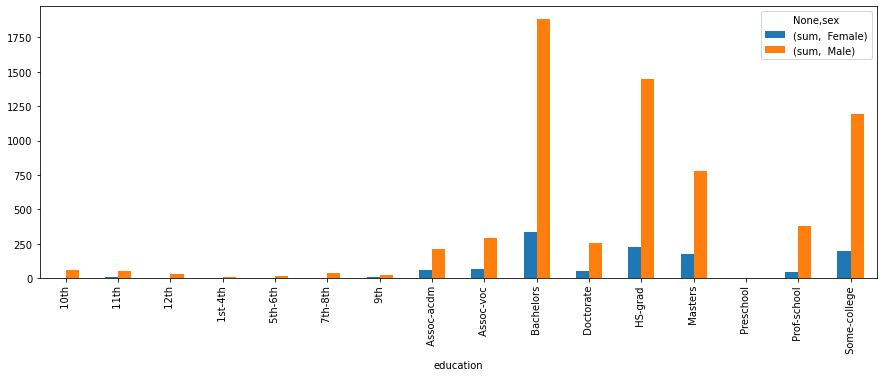

In [69]:
adult.pivot_table(index='education', columns='sex',  aggfunc='sum')
pt = adult.pivot_table(index='education', columns='sex', values='label_50', aggfunc=['sum'])
# pt = adult.pivot_table(index = 'occupation', columns ='sex', values = 'label_50', aggfunc=['sum'])
print(pt)
pt.plot(kind ='bar', figsize=(15,5))

Exec Managerial, Prof-speciality and sales has highest number of male and female earn more than 50K. It may be one imp feature, we should validate it later <br>
Multiple columns can also be used during pivoting, we can use pivot_table like following. sum is adding all 1 value of label_50 and size is simple count of values, thats why it is same for education and label_50.

For multiple aggregation functions:-
adult.pivot_table(index = 'occupation', columns =['sex','occupation'] , values = ['label_50','education'], 
                  aggfunc={'label_50': sum,'education':sum}).head(5)

In [70]:
pt = adult.pivot_table(index='education', columns=['marital_status', 'sex'], values='label_50', aggfunc='sum')
# pt= adult.pivot_table(index = 'occupation', columns =['marital_status','sex'] , values='label_50', 
#                   aggfunc='sum')
pt.head(5)

marital_status  Divorced        Married-AF-spouse        Married-civ-spouse  \
sex               Female  Male             Female  Male              Female   
education                                                                     
 10th                0.0   2.0                NaN   NaN                 2.0   
 11th                3.0   5.0                NaN   NaN                 3.0   
 12th                0.0   2.0                NaN   NaN                 4.0   
 1st-4th             0.0   0.0                NaN   NaN                 0.0   
 5th-6th             0.0   0.0                NaN   NaN                 2.0   

marital_status        Married-spouse-absent        Never-married        \
sex             Male                 Female  Male         Female  Male   
education                                                                
 10th           53.0                    0.0   0.0            0.0   3.0   
 11th           41.0                    0.0   0.0            0.0   6.0   
 12th           25.0                    0.0   0.0            0.0   1.0   
 1st-4th         6.0                    0.0   0.0            0.0   0.0   
 5th-6th        13.0                    0.0   0.0            0.0   1.0   

marital_status  Separated        Widowed        
sex                Female  Male   Female  Male  
education                                       
 10th                 0.0   1.0      1.0   0.0  
 11th                 0.0   0.0      2.0   0.0  
 12th                 0.0   0.0      0.0   1.0  
 1st-4th              0.0   0.0      0.0   0.0  
 5th-6th              0.0   0.0      0.0   0.0

**As per our last exercise, see the index and columns of this pivot table**

In [71]:
pt.index

Index([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',
       ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad',
       ' Masters', ' Preschool', ' Prof-school', ' Some-college'],
      dtype='object', name='education')

In [72]:
pt.columns

MultiIndex([(             ' Divorced', ' Female'),
            (             ' Divorced',   ' Male'),
            (    ' Married-AF-spouse', ' Female'),
            (    ' Married-AF-spouse',   ' Male'),
            (   ' Married-civ-spouse', ' Female'),
            (   ' Married-civ-spouse',   ' Male'),
            (' Married-spouse-absent', ' Female'),
            (' Married-spouse-absent',   ' Male'),
            (        ' Never-married', ' Female'),
            (        ' Never-married',   ' Male'),
            (            ' Separated', ' Female'),
            (            ' Separated',   ' Male'),
            (              ' Widowed', ' Female'),
            (              ' Widowed',   ' Male')],
           names=['marital_status', 'sex'])

**Multiindex columns can be reduced while we rename our columns like following**

In [73]:
pt_copy=pt.copy()
pt_copy.columns=pt_copy.columns.map('_'.join)
pt_copy.head()

,Divorced_ Female,Divorced_ Male,Married-AF-spouse_ Female,Married-AF-spouse_ Male,Married-civ-spouse_ Female,Married-civ-spouse_ Male,Married-spouse-absent_ Female,Married-spouse-absent_ Male,Never-married_ Female,Never-married_ Male,Separated_ Female,Separated_ Male,Widowed_ Female,Widowed_ Male
education,,,,,,,,,,,,,,
10th,0.0,2.0,NaN,NaN,2.0,53.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0
11th,3.0,5.0,NaN,NaN,3.0,41.0,0.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0
12th,0.0,2.0,NaN,NaN,4.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1st-4th,0.0,0.0,NaN,NaN,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5th-6th,0.0,0.0,NaN,NaN,2.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


They can be joined back anytime in the real data to add a feature

## Crosstab
pd.crosstab can be used just like  pivot_table, but it computes a simple cross-tabulation of two (or more) categorical features. 
By default it computes a frequency table of the categorical features, since values are not mandatory for crosstab, but values and aggregation function can be passed, if required.<br>
Let's look at a simple example of crosstab and plot it. Education is also one important factor in earning.

In [76]:
ct = pd.crosstab(index = adult.education, columns = adult.sex).head(20)
ct

sex,Female,Male
education,,
10th,295,638
11th,432,743
12th,144,289
1st-4th,46,122
5th-6th,84,249
7th-8th,160,486
9th,144,370
Assoc-acdm,421,646
Assoc-voc,500,882


<AxesSubplot:xlabel='education'>

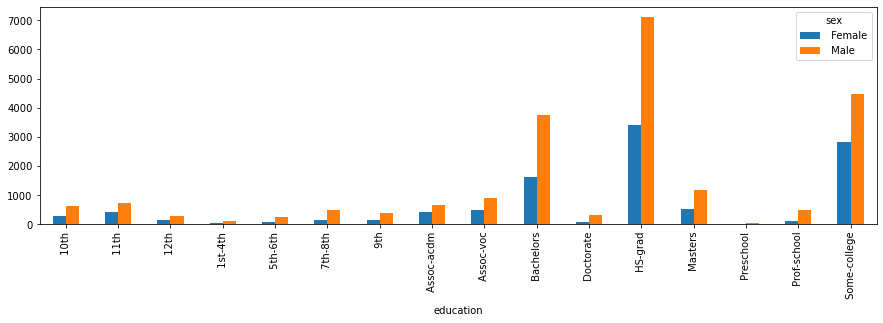

In [78]:
ct.plot(kind ='bar',figsize=(15,4))

Crosstab can be used just like pivot_table, if values and aggregation parameters. Following is a Bar plot of people earn more than 50K across education and sex(male/female) features

In [81]:
ct = pd.crosstab(index = adult.education,columns = adult.sex, values = adult.label_50, aggfunc='sum')

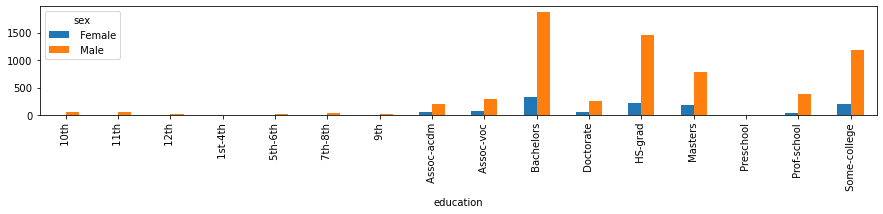

In [82]:
ct.plot(kind ='bar',figsize=(15,2));

Despite of highest female in HS_grad, the highest feamle earners are bachelors <br>
pd.cross tab has a parameter Normalized. While we do bivariate analysis, frequency tables can also be normalized to show percentages rather than counts, percentages are used in statistical tests to validate are assumptions:

In [83]:
pd.crosstab(adult.education,adult.label_50, normalize = True)

label_50,0,1
education,,
10th,0.026750,0.001904
11th,0.034243,0.001843
12th,0.012285,0.001013
1st-4th,0.004975,0.000184
5th-6th,0.009736,0.000491
7th-8th,0.018611,0.001228
9th,0.014957,0.000829
Assoc-acdm,0.024631,0.008139
Assoc-voc,0.031357,0.011087


## Stack Unstack

Stacking a DataFrame means moving the innermost column index to become the innermost row index. The inverse operation is called unstacking.<br>
What is Stacking? - If we have multiple-index columns and we reduce dataset columns by moving innermost column level to innermost row level. So stack is cols to rows(innermost) <br>
What is Unstacking?- If we have multiple-index rows and we reduce dataset rows by moving innermost row level to innermost column level. So stack is rows to cols(innermost) <br>
Also, stack can be called with a 'level' parameter to select which level in the columns to stack:<br>
In our downloaded data, we don't have any multiple indexes, but our pivoted dataset has multiple indexes

In [100]:
pt = adult.pivot_table(index='education', columns=['marital_status', 'sex'], values='label_50', aggfunc='sum')
pt.head()

marital_status  Divorced        Married-AF-spouse        Married-civ-spouse  \
sex               Female  Male             Female  Male              Female   
education                                                                     
 10th                0.0   2.0                NaN   NaN                 2.0   
 11th                3.0   5.0                NaN   NaN                 3.0   
 12th                0.0   2.0                NaN   NaN                 4.0   
 1st-4th             0.0   0.0                NaN   NaN                 0.0   
 5th-6th             0.0   0.0                NaN   NaN                 2.0   

marital_status        Married-spouse-absent        Never-married        \
sex             Male                 Female  Male         Female  Male   
education                                                                
 10th           53.0                    0.0   0.0            0.0   3.0   
 11th           41.0                    0.0   0.0            0.0   6.0   
 12th           25.0                    0.0   0.0            0.0   1.0   
 1st-4th         6.0                    0.0   0.0            0.0   0.0   
 5th-6th        13.0                    0.0   0.0            0.0   1.0   

marital_status  Separated        Widowed        
sex                Female  Male   Female  Male  
education                                       
 10th                 0.0   1.0      1.0   0.0  
 11th                 0.0   0.0      2.0   0.0  
 12th                 0.0   0.0      0.0   1.0  
 1st-4th              0.0   0.0      0.0   0.0  
 5th-6th              0.0   0.0      0.0   0.0

In [101]:
pt2 = pt.stack().head(10)
pt2

marital_status      Divorced   Married-AF-spouse   Married-civ-spouse  \
education sex                                                           
 10th      Female        0.0                 NaN                  2.0   
           Male          2.0                 NaN                 53.0   
 11th      Female        3.0                 NaN                  3.0   
           Male          5.0                 NaN                 41.0   
 12th      Female        0.0                 NaN                  4.0   
           Male          2.0                 NaN                 25.0   
 1st-4th   Female        0.0                 NaN                  0.0   
           Male          0.0                 NaN                  6.0   
 5th-6th   Female        0.0                 NaN                  2.0   
           Male          0.0                 NaN                 13.0   

marital_status      Married-spouse-absent   Never-married   Separated  \
education sex                                                           
 10th      Female                     0.0             0.0         0.0   
           Male                       0.0             3.0         1.0   
 11th      Female                     0.0             0.0         0.0   
           Male                       0.0             6.0         0.0   
 12th      Female                     0.0             0.0         0.0   
           Male                       0.0             1.0         0.0   
 1st-4th   Female                     0.0             0.0         0.0   
           Male                       0.0             0.0         0.0   
 5th-6th   Female                     0.0             0.0         0.0   
           Male                       0.0             1.0         0.0   

marital_status      Widowed  
education sex                
 10th      Female       1.0  
           Male         0.0  
 11th      Female       2.0  
           Male         0.0  
 12th      Female       0.0  
           Male         1.0  
 1st-4th   Female       0.0  
           Male         0.0  
 5th-6th   Female       0.0  
           Male         0.0

In [102]:
pt2.unstack()

marital_status  Divorced        Married-AF-spouse        Married-civ-spouse  \
sex               Female  Male             Female  Male              Female   
education                                                                     
 10th                0.0   2.0                NaN   NaN                 2.0   
 11th                3.0   5.0                NaN   NaN                 3.0   
 12th                0.0   2.0                NaN   NaN                 4.0   
 1st-4th             0.0   0.0                NaN   NaN                 0.0   
 5th-6th             0.0   0.0                NaN   NaN                 2.0   

marital_status        Married-spouse-absent        Never-married        \
sex             Male                 Female  Male         Female  Male   
education                                                                
 10th           53.0                    0.0   0.0            0.0   3.0   
 11th           41.0                    0.0   0.0            0.0   6.0   
 12th           25.0                    0.0   0.0            0.0   1.0   
 1st-4th         6.0                    0.0   0.0            0.0   0.0   
 5th-6th        13.0                    0.0   0.0            0.0   1.0   

marital_status  Separated        Widowed        
sex                Female  Male   Female  Male  
education                                       
 10th                 0.0   1.0      1.0   0.0  
 11th                 0.0   0.0      2.0   0.0  
 12th                 0.0   0.0      0.0   1.0  
 1st-4th              0.0   0.0      0.0   0.0  
 5th-6th              0.0   0.0      0.0   0.0

In [103]:
pt.head()

marital_status  Divorced        Married-AF-spouse        Married-civ-spouse  \
sex               Female  Male             Female  Male              Female   
education                                                                     
 10th                0.0   2.0                NaN   NaN                 2.0   
 11th                3.0   5.0                NaN   NaN                 3.0   
 12th                0.0   2.0                NaN   NaN                 4.0   
 1st-4th             0.0   0.0                NaN   NaN                 0.0   
 5th-6th             0.0   0.0                NaN   NaN                 2.0   

marital_status        Married-spouse-absent        Never-married        \
sex             Male                 Female  Male         Female  Male   
education                                                                
 10th           53.0                    0.0   0.0            0.0   3.0   
 11th           41.0                    0.0   0.0            0.0   6.0   
 12th           25.0                    0.0   0.0            0.0   1.0   
 1st-4th         6.0                    0.0   0.0            0.0   0.0   
 5th-6th        13.0                    0.0   0.0            0.0   1.0   

marital_status  Separated        Widowed        
sex                Female  Male   Female  Male  
education                                       
 10th                 0.0   1.0      1.0   0.0  
 11th                 0.0   0.0      2.0   0.0  
 12th                 0.0   0.0      0.0   1.0  
 1st-4th              0.0   0.0      0.0   0.0  
 5th-6th              0.0   0.0      0.0   0.0

In [104]:
pt.stack(level =0).head(10)  # marital_status-ის მიხედვით
pt.stack(level =1).head(10)  # სქესის მიხედვით

marital_status      Divorced   Married-AF-spouse   Married-civ-spouse  \
education sex                                                           
 10th      Female        0.0                 NaN                  2.0   
           Male          2.0                 NaN                 53.0   
 11th      Female        3.0                 NaN                  3.0   
           Male          5.0                 NaN                 41.0   
 12th      Female        0.0                 NaN                  4.0   
           Male          2.0                 NaN                 25.0   
 1st-4th   Female        0.0                 NaN                  0.0   
           Male          0.0                 NaN                  6.0   
 5th-6th   Female        0.0                 NaN                  2.0   
           Male          0.0                 NaN                 13.0   

marital_status      Married-spouse-absent   Never-married   Separated  \
education sex                                                           
 10th      Female                     0.0             0.0         0.0   
           Male                       0.0             3.0         1.0   
 11th      Female                     0.0             0.0         0.0   
           Male                       0.0             6.0         0.0   
 12th      Female                     0.0             0.0         0.0   
           Male                       0.0             1.0         0.0   
 1st-4th   Female                     0.0             0.0         0.0   
           Male                       0.0             0.0         0.0   
 5th-6th   Female                     0.0             0.0         0.0   
           Male                       0.0             1.0         0.0   

marital_status      Widowed  
education sex                
 10th      Female       1.0  
           Male         0.0  
 11th      Female       2.0  
           Male         0.0  
 12th      Female       0.0  
           Male         1.0  
 1st-4th   Female       0.0  
           Male         0.0  
 5th-6th   Female       0.0  
           Male         0.0

On pivoted data, stack moved the inner level column to inner level rows and unstacking it again brought it back to the original pivot shape

In [57]:
pt.stack().head()

marital_status          Divorced   Married-AF-spouse   Married-civ-spouse  \
occupation    sex                                                           
 ?             Female        4.0                 0.0                 42.0   
               Male          2.0                 NaN                129.0   
 Adm-clerical  Female       15.0                 1.0                171.0   
               Male         11.0                 0.0                264.0   
 Armed-Forces  Male          NaN                 NaN                  1.0   

marital_status          Married-spouse-absent   Never-married   Separated  \
occupation    sex                                                           
 ?             Female                     0.0             2.0         0.0   
               Male                       1.0             7.0         0.0   
 Adm-clerical  Female                     1.0            17.0         1.0   
               Male                       1.0            16.0         2.0   
 Armed-Forces  Male                       NaN             0.0         NaN   

marital_status          Widowed  
occupation    sex                
 ?             Female       4.0  
               Male         0.0  
 Adm-clerical  Female       6.0  
               Male         1.0  
 Armed-Forces  Male         NaN

In [59]:
pt.stack().unstack().head()

marital_status    Divorced        Married-AF-spouse        Married-civ-spouse  \
sex                 Female  Male             Female  Male              Female   
occupation                                                                      
 ?                     4.0   2.0                0.0   NaN                42.0   
 Adm-clerical         15.0  11.0                1.0   0.0               171.0   
 Armed-Forces          NaN   NaN                NaN   NaN                 NaN   
 Craft-repair          7.0  38.0                1.0   1.0                10.0   
 Exec-managerial      66.0  77.0                1.0   NaN               155.0   

marital_status            Married-spouse-absent        Never-married        \
sex                 Male                 Female  Male         Female  Male   
occupation                                                                   
 ?                 129.0                    0.0   1.0            2.0   7.0   
 Adm-clerical      264.0                    1.0   1.0           17.0  16.0   
 Armed-Forces        1.0                    NaN   NaN            NaN   0.0   
 Craft-repair      823.0                    0.0   4.0            2.0  33.0   
 Exec-managerial  1511.0                    3.0   5.0           42.0  70.0   

marital_status    Separated        Widowed        
sex                  Female  Male   Female  Male  
occupation                                        
 ?                      0.0   0.0      4.0   0.0  
 Adm-clerical           1.0   2.0      6.0   1.0  
 Armed-Forces           NaN   NaN      NaN   NaN  
 Craft-repair           0.0   6.0      0.0   4.0  
 Exec-managerial        3.0  16.0     10.0   9.0

Stacking/Unstacking is possible at differnt levels directly with parameter level

In [58]:
pt.stack(level =1).head(10)

marital_status             Divorced   Married-AF-spouse   Married-civ-spouse  \
occupation       sex                                                           
 ?                Female        4.0                 0.0                 42.0   
                  Male          2.0                 NaN                129.0   
 Adm-clerical     Female       15.0                 1.0                171.0   
                  Male         11.0                 0.0                264.0   
 Armed-Forces     Male          NaN                 NaN                  1.0   
 Craft-repair     Female        7.0                 1.0                 10.0   
                  Male         38.0                 1.0                823.0   
 Exec-managerial  Female       66.0                 1.0                155.0   
                  Male         77.0                 NaN               1511.0   
 Farming-fishing  Female        1.0                 NaN                  0.0   

marital_status             Married-spouse-absent   Never-married   Separated  \
occupation       sex                                                           
 ?                Female                     0.0             2.0         0.0   
                  Male                       1.0             7.0         0.0   
 Adm-clerical     Female                     1.0            17.0         1.0   
                  Male                       1.0            16.0         2.0   
 Armed-Forces     Male                       NaN             0.0         NaN   
 Craft-repair     Female                     0.0             2.0         0.0   
                  Male                       4.0            33.0         6.0   
 Exec-managerial  Female                     3.0            42.0         3.0   
                  Male                       5.0            70.0        16.0   
 Farming-fishing  Female                     1.0             0.0         0.0   

marital_status             Widowed  
occupation       sex                
 ?                Female       4.0  
                  Male         0.0  
 Adm-clerical     Female       6.0  
                  Male         1.0  
 Armed-Forces     Male         NaN  
 Craft-repair     Female       0.0  
                  Male         4.0  
 Exec-managerial  Female      10.0  
                  Male         9.0  
 Farming-fishing  Female       0.0

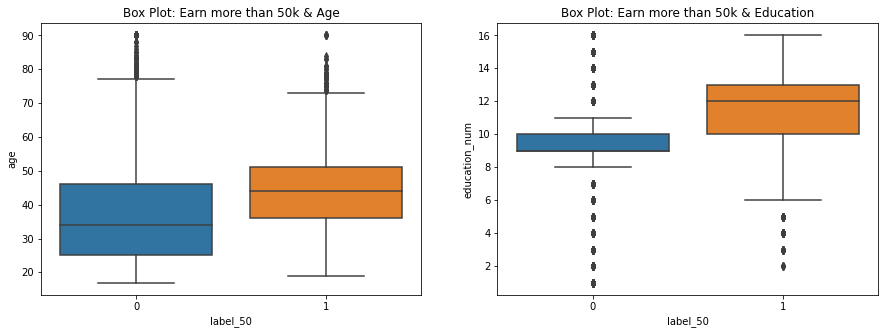

In [106]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(15,5)) # not add axs while defining 
## plotting
sns.boxplot(x = adult.label_50, y = adult.age, ax = ax1).set_title('Box Plot: Earn more than 50k & Age');
sns.boxplot(x = adult.label_50, y = adult.education_num, ax = ax2).set_title('Box Plot: Earn more than 50k & Education');

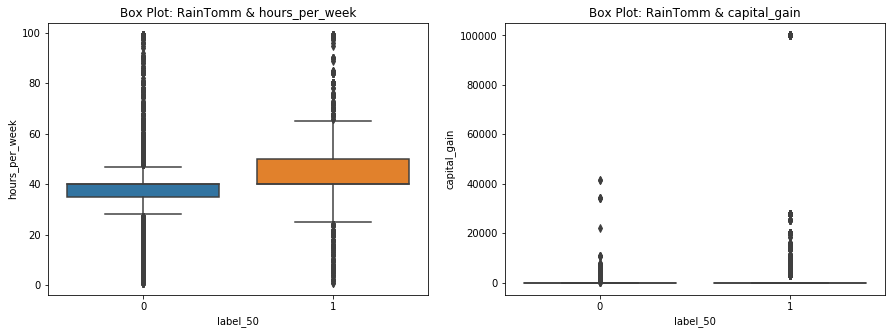

In [49]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(15,5)) # not add axs while defining 

sns.boxplot(x = adult.label_50, y = adult.hours_per_week, ax = ax1).set_title('Box Plot: RainTomm & hours_per_week');
sns.boxplot(x = adult.label_50, y = adult.capital_gain, ax = ax2).set_title('Box Plot: RainTomm & capital_gain');